# DRESS RATING PREDICTION

## READING DATA

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
%matplotlib inline

In [73]:
reviews = pd.read_csv('reviews.csv')

In [74]:
reviews.head()

,age,body type,bust size,category,fit,height,item_id,rating,rented for,review_date,review_summary,review_text,size,user_id,weight
0,36.0,athletic,32ddd/e,sweater,fit,"5' 6""",2340200,10.0,everyday,"April 10, 2016",b'Want to buy it',b'Perfect for everyday!',8,427200,140lbs
1,37.0,full bust,36d,gown,large,"5' 6""",139086,10.0,wedding,"September 23, 2013",b'Makes a statement...tons of compliments all ...,b'This dress was a last minute emergency repla...,20,162760,128lbs
2,33.0,athletic,34b,gown,fit,"5' 5""",162634,8.0,wedding,"July 17, 2014",b'Perfect for Black Tie optional Wedding!!',"b""The dress was a very bright blue color in pe...",12,714701,132lbs
3,30.0,athletic,38b,dress,fit,"5' 2""",174086,10.0,wedding,"March 28, 2017",b'I loved the fit and pockets! ',b'I loved the fit of this dress. I wore it thr...,28,97194,NaN
4,31.0,full bust,34c,dress,fit,"5' 3""",916397,10.0,work,"November 18, 2015",b'really great dress!',"b""i wore this for work meetings and it was per...",12,691468,125lbs


In [78]:
plt.rcdefaults()
fig, ax = plt.subplots()

In [95]:
category = pd.DataFrame(data = reviews, columns= ['category', 'rating'])

In [96]:
category.head()

,category,rating
0,sweater,10.0
1,gown,10.0
2,gown,8.0
3,dress,10.0
4,dress,10.0


In [100]:
cat = category.groupby(by = 'category')

In [104]:
cat = cat.agg(np.mean)

In [108]:
cat = cat.sort_values('rating')

In [124]:
cat.head()

,rating
category,
kaftan,5.750000
trench,7.200000
henley,8.000000
buttondown,8.000000
kimono,8.222222


In [121]:
Least_cat = cat[0:10]

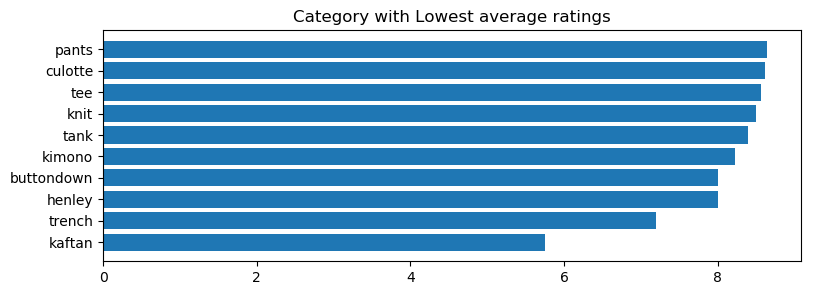

In [128]:
plt.figure(figsize=(9, 3))
plt.barh(Least_cat.index, Least_cat.rating)
plt.title('Category with Lowest average ratings')
plt.show()

#### As per analysis kaftan,trench,henley are the worst performer according to ratings

In [125]:
Most_cat = cat[-10:]

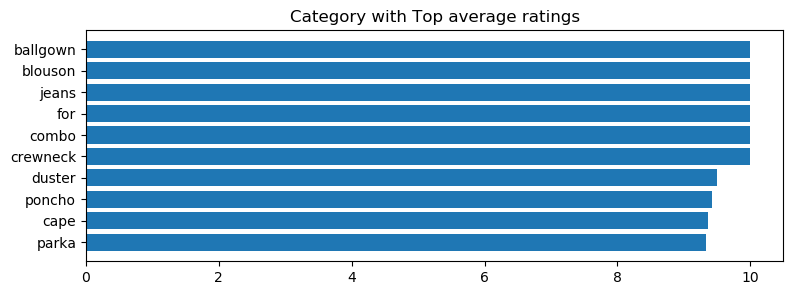

In [127]:
plt.figure(figsize=(9, 3))
plt.barh(Most_cat.index, Most_cat.rating)
plt.title('Category with Top average ratings')
plt.show()

In [169]:
#### As per analysis kaftan,trench,henley are the top performer according to ratings

In [157]:
rented = pd.DataFrame(data = reviews, columns= ['rented for', 'rating'])

In [158]:
rented = rented.groupby(by = 'rented for')

In [159]:
rented = rented.agg(np.mean)

In [160]:
rented = rented.sort_values('rating')

In [161]:
rented

,rating
rented for,
work,8.814103
everyday,8.836303
date,8.913187
vacation,8.979472
party,9.061506
other,9.113080
wedding,9.183617
formal affair,9.197064


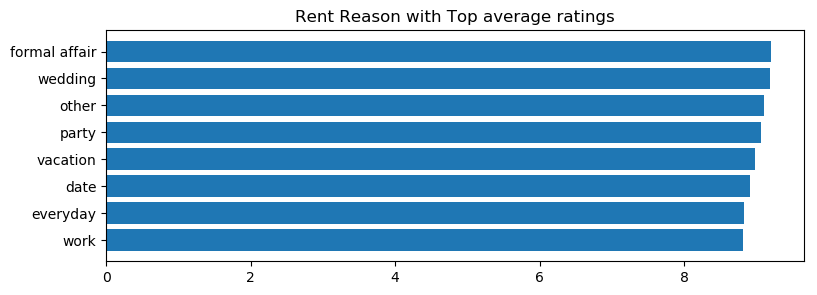

In [166]:
plt.figure(figsize=(9, 3))
plt.barh(rented.index, rented.rating)
plt.title('Rent Reason with Top average ratings')
plt.show()

In [163]:
fit = pd.DataFrame(data = reviews, columns= ['fit', 'rating'])

In [164]:
fit = fit.groupby(by = 'fit')
fit = fit.agg(np.mean)
fit = fit.sort_values('rating')

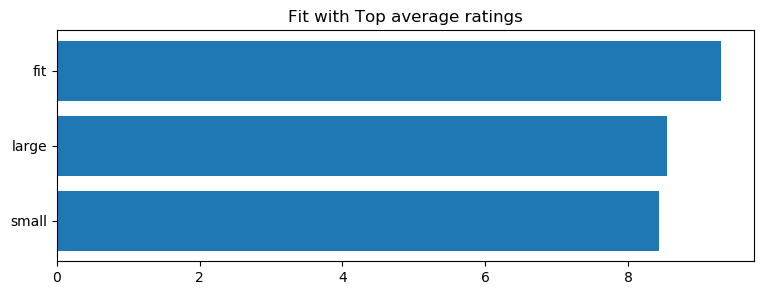

In [167]:
plt.figure(figsize=(9, 3))
plt.barh(fit.index, fit.rating)
plt.title('Fit with Top average ratings')
plt.show()

## DATA CLEANING

In [4]:
# removing b' from the review summary
reviews['review_summary'] = reviews['review_summary'].str[1:]

In [5]:
# removing b' from the review summary
reviews['review_text'] = reviews['review_text'].str[1:]

In [6]:
# creating column for different values present in body type which only have 0 and 1 which can be used for training
body = pd.get_dummies(reviews['body type'])

In [7]:
body.head()

,apple,athletic,full bust,hourglass,pear,petite,straight & narrow
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0


In [8]:
# creating column for different values present in category which only have 0 and 1 which can be used for training
category = pd.get_dummies(reviews['category'])

In [9]:
category.head()

,ballgown,blazer,blouse,blouson,bomber,buttondown,cami,cape,cardigan,coat,...,t-shirt,tank,tee,top,trench,trouser,trousers,tunic,turtleneck,vest
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# creating column for different values present in fir which only have 0 and 1 which can be used for training
fit = pd.get_dummies(reviews['fit'])

In [11]:
fit.head()

,fit,large,small
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [12]:
# creating column for different values present in rented which only have 0 and 1 which can be used for training
rented = pd.get_dummies(reviews['rented for'])

In [13]:
rented.head()

,date,everyday,formal affair,other,party,vacation,wedding,work
0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1


In [14]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48136 entries, 0 to 48135
Data columns (total 15 columns):
age               47894 non-null float64
body type         44544 non-null object
bust size         43567 non-null object
category          48136 non-null object
fit               48136 non-null object
height            47952 non-null object
item_id           48136 non-null int64
rating            48116 non-null float64
rented for        48133 non-null object
review_date       48136 non-null object
review_summary    48136 non-null object
review_text       48136 non-null object
size              48136 non-null int64
user_id           48136 non-null int64
weight            40594 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 5.5+ MB


In [15]:
# creatin year column
reviews['year'] = ""

In [16]:
# getting years in column names 'Year' from reiew_date column
reviews['year'] = reviews['review_date'].str[-4:]

In [17]:
reviews.head()

,age,body type,bust size,category,fit,height,item_id,rating,rented for,review_date,review_summary,review_text,size,user_id,weight,year
0,36.0,athletic,32ddd/e,sweater,fit,"5' 6""",2340200,10.0,everyday,"April 10, 2016",'Want to buy it','Perfect for everyday!',8,427200,140lbs,2016
1,37.0,full bust,36d,gown,large,"5' 6""",139086,10.0,wedding,"September 23, 2013",'Makes a statement...tons of compliments all n...,'This dress was a last minute emergency replac...,20,162760,128lbs,2013
2,33.0,athletic,34b,gown,fit,"5' 5""",162634,8.0,wedding,"July 17, 2014",'Perfect for Black Tie optional Wedding!!',"""The dress was a very bright blue color in per...",12,714701,132lbs,2014
3,30.0,athletic,38b,dress,fit,"5' 2""",174086,10.0,wedding,"March 28, 2017",'I loved the fit and pockets! ','I loved the fit of this dress. I wore it thro...,28,97194,NaN,2017
4,31.0,full bust,34c,dress,fit,"5' 3""",916397,10.0,work,"November 18, 2015",'really great dress!',"""i wore this for work meetings and it was perf...",12,691468,125lbs,2015


In [18]:
# creatin days column
reviews['day'] = ""

In [19]:
# getting days in column names 'Days' from reiew_date column
reviews['day'] = reviews['review_date'].str[-8:-6]

In [20]:
# cleaning height column value 

In [21]:
# replacing single quotes with blank space
reviews['height'] = reviews['height'].str.replace('\' ', '.')

In [22]:
# replacing double quotes with blank space
reviews['height'] = reviews['height'].str.replace('"','')

In [23]:
# conversion of string value to flaot
reviews['height'] = reviews['height'].astype('float')

In [24]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48136 entries, 0 to 48135
Data columns (total 17 columns):
age               47894 non-null float64
body type         44544 non-null object
bust size         43567 non-null object
category          48136 non-null object
fit               48136 non-null object
height            47952 non-null float64
item_id           48136 non-null int64
rating            48116 non-null float64
rented for        48133 non-null object
review_date       48136 non-null object
review_summary    48136 non-null object
review_text       48136 non-null object
size              48136 non-null int64
user_id           48136 non-null int64
weight            40594 non-null object
year              48136 non-null object
day               48136 non-null object
dtypes: float64(3), int64(3), object(11)
memory usage: 6.2+ MB


In [25]:
# cleaning weight column value removing "lbs"
reviews['weight'] = reviews['weight'].str.replace('lbs','')

In [26]:
#merging new created dataframes with original reviews dataframe
reviews = pd.concat([reviews,body,category,fit,rented],axis = 1)

In [27]:
reviews.head()

,age,body type,bust size,category,fit,height,item_id,rating,rented for,review_date,...,large,small,date,everyday,formal affair,other,party,vacation,wedding,work
0,36.0,athletic,32ddd/e,sweater,fit,5.6,2340200,10.0,everyday,"April 10, 2016",...,0,0,0,1,0,0,0,0,0,0
1,37.0,full bust,36d,gown,large,5.6,139086,10.0,wedding,"September 23, 2013",...,1,0,0,0,0,0,0,0,1,0
2,33.0,athletic,34b,gown,fit,5.5,162634,8.0,wedding,"July 17, 2014",...,0,0,0,0,0,0,0,0,1,0
3,30.0,athletic,38b,dress,fit,5.2,174086,10.0,wedding,"March 28, 2017",...,0,0,0,0,0,0,0,0,1,0
4,31.0,full bust,34c,dress,fit,5.3,916397,10.0,work,"November 18, 2015",...,0,0,0,0,0,0,0,0,0,1


In [28]:
col = ['body type', 'bust size', 'category', 'fit', 'rented for', 'review_date', 'user_id', 'item_id']

## IMPLEMENTING MACHINE LEARNING ALGORITHMS

### PART 1: Without Text Data

In [29]:
# droping the column which are of no use
reviews.drop(columns=col, inplace=True)

In [30]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48136 entries, 0 to 48135
Data columns (total 88 columns):
age                  47894 non-null float64
height               47952 non-null float64
rating               48116 non-null float64
review_summary       48136 non-null object
review_text          48136 non-null object
size                 48136 non-null int64
weight               40594 non-null object
year                 48136 non-null object
day                  48136 non-null object
apple                48136 non-null uint8
athletic             48136 non-null uint8
full bust            48136 non-null uint8
hourglass            48136 non-null uint8
pear                 48136 non-null uint8
petite               48136 non-null uint8
straight & narrow    48136 non-null uint8
ballgown             48136 non-null uint8
blazer               48136 non-null uint8
blouse               48136 non-null uint8
blouson              48136 non-null uint8
bomber               48136 non-null uint

In [31]:
# converting all the string object to float
reviews['weight'] = reviews['weight'].astype('float')
reviews['year'] = reviews['year'].astype('float')
reviews['day'] = reviews['day'].astype('float')

In [32]:
# droping column having null values
reviews.dropna(inplace=True)

### Implementing Logistic Regression

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [34]:
drop_col = ['review_text', 'review_summary']

In [35]:
X = reviews.drop(columns=drop_col)

In [36]:
Y = reviews.rating

In [37]:
X.head()

,age,height,rating,size,weight,year,day,apple,athletic,full bust,...,large,small,date,everyday,formal affair,other,party,vacation,wedding,work
0,36.0,5.6,10.0,8,140.0,2016.0,10.0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,37.0,5.6,10.0,20,128.0,2013.0,23.0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
2,33.0,5.5,8.0,12,132.0,2014.0,17.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,31.0,5.3,10.0,12,125.0,2015.0,18.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,36.0,5.5,10.0,20,150.0,2015.0,17.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=101)

In [39]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
score = classifier.score(x_test, y_test)

C:\Users\Ajit Kumar\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajit Kumar\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [40]:
print(score)

0.9197940390137638


In [41]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
predictions = classifier.predict(x_test)

In [43]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00        53
         4.0       0.00      0.00      0.00       158
         6.0       0.00      0.00      0.00       599
         8.0       0.78      1.00      0.87      2814
        10.0       1.00      1.00      1.00      6475

   micro avg       0.92      0.92      0.92     10099
   macro avg       0.36      0.40      0.37     10099
weighted avg       0.86      0.92      0.88     10099



C:\Users\Ajit Kumar\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### The above classification report shows that Logistic regression is able to predict all 5 star rating correctly (precision = 1) but could not predict star 2, 4 and 6 rating.

In [44]:
confusion_matrix(y_test, predictions)

array([[   0,    0,    4,   49,    0],
       [   0,    0,    0,  158,    0],
       [   0,    0,    0,  599,    0],
       [   0,    0,    0, 2814,    0],
       [   0,    0,    0,    0, 6475]], dtype=int64)

### Implementing Naive Bayes

In [45]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(x_train, y_train)

In [46]:
score = clf.score(x_test, y_test)

In [47]:
print("Accuracy:", score)

('Accuracy:', 0.6641251609070205)


In [48]:
prediction_nb = clf.predict(x_test)

In [49]:
print(classification_report(y_test, prediction_nb))

              precision    recall  f1-score   support

         2.0       1.00      0.15      0.26        53
         4.0       0.38      0.07      0.12       158
         6.0       0.32      0.04      0.07       599
         8.0       0.43      0.19      0.27      2814
        10.0       0.70      0.95      0.81      6475

   micro avg       0.66      0.66      0.66     10099
   macro avg       0.57      0.28      0.30     10099
weighted avg       0.60      0.66      0.60     10099



#### The above classification report shows that Navive Bayes is able to predict all 2 star rating correctly (precision = 1) unlike Logistic regression. But as there is less percentage of 2 star compared to 10 star rating in test data, the accuracy score is only 66%

### Implementing Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [51]:
clf.fit(x_train,y_train)
pred = clf.predict(x_test)

C:\Users\Ajit Kumar\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [52]:
score = clf.score(x_test, y_test)

In [53]:
print("Accuracy:", score)

('Accuracy:', 0.9843548866224379)


In [54]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         2.0       0.55      0.21      0.30        53
         4.0       0.77      0.54      0.64       158
         6.0       0.89      0.93      0.91       599
         8.0       0.98      1.00      0.99      2814
        10.0       1.00      1.00      1.00      6475

   micro avg       0.98      0.98      0.98     10099
   macro avg       0.84      0.74      0.77     10099
weighted avg       0.98      0.98      0.98     10099



#### The above classification report shows that Random Forest is able to predict all 10 star rating correctly (precision = 1). It is also able to predict other ratings with good accuracy. Hence this is the better performing algorithm.

## PART 2: With Text Data

In [55]:
reviews.head()

,age,height,rating,review_summary,review_text,size,weight,year,day,apple,...,large,small,date,everyday,formal affair,other,party,vacation,wedding,work
0,36.0,5.6,10.0,'Want to buy it','Perfect for everyday!',8,140.0,2016.0,10.0,0,...,0,0,0,1,0,0,0,0,0,0
1,37.0,5.6,10.0,'Makes a statement...tons of compliments all n...,'This dress was a last minute emergency replac...,20,128.0,2013.0,23.0,0,...,1,0,0,0,0,0,0,0,1,0
2,33.0,5.5,8.0,'Perfect for Black Tie optional Wedding!!',"""The dress was a very bright blue color in per...",12,132.0,2014.0,17.0,0,...,0,0,0,0,0,0,0,0,1,0
4,31.0,5.3,10.0,'really great dress!',"""i wore this for work meetings and it was perf...",12,125.0,2015.0,18.0,0,...,0,0,0,0,0,0,0,0,0,1
5,36.0,5.5,10.0,'looooooooooooved the full skirt to twirl arou...,"""it's pretty tight around the ribs (on me) so ...",20,150.0,2015.0,17.0,0,...,0,0,0,0,0,0,0,0,1,0


In [56]:
sentences_train, sentences_test, y_train, y_test = train_test_split(reviews['review_text'], reviews['rating'], test_size=0.25, random_state=101)

In [57]:
vectorizer = CountVectorizer(ngram_range=(2,3), max_features= 15000)
vectorizer.fit(sentences_train)

x_train = vectorizer.transform(sentences_train)
x_test  = vectorizer.transform(sentences_test)

#### Transforming textual data into multiple numeric columns (max - 15000) by using count vectorizer.  

### Implementing Logistic Regression

In [58]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
score = classifier.score(x_test, y_test)

In [59]:
print("Accuracy:", score)

('Accuracy:', 0.6601643727101694)


In [60]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
predictions = classifier.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         2.0       0.40      0.04      0.07        53
         4.0       0.26      0.06      0.10       158
         6.0       0.35      0.21      0.26       599
         8.0       0.45      0.40      0.42      2814
        10.0       0.75      0.84      0.79      6475

   micro avg       0.66      0.66      0.66     10099
   macro avg       0.44      0.31      0.33     10099
weighted avg       0.63      0.66      0.64     10099



### Implementing Navive Bayes

In [62]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(x_train, y_train)

In [63]:
score = clf.score(x_test, y_test)
print("Accuracy:", score)

('Accuracy:', 0.6605604515298544)


In [64]:
predictions = clf.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00        53
         4.0       0.15      0.09      0.11       158
         6.0       0.30      0.52      0.38       599
         8.0       0.48      0.50      0.49      2814
        10.0       0.82      0.76      0.79      6475

   micro avg       0.66      0.66      0.66     10099
   macro avg       0.35      0.37      0.35     10099
weighted avg       0.68      0.66      0.67     10099



### Implementing Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [66]:
clf.fit(x_train,y_train)
pred = clf.predict(x_test)

In [67]:
score = clf.score(x_test, y_test)
print("Accuracy:", score)

('Accuracy:', 0.6441231805129221)


In [68]:
predictions = clf.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00        53
         4.0       0.00      0.00      0.00       158
         6.0       0.26      0.05      0.09       599
         8.0       0.43      0.33      0.37      2814
        10.0       0.71      0.86      0.78      6475

   micro avg       0.64      0.64      0.64     10099
   macro avg       0.28      0.25      0.25     10099
weighted avg       0.59      0.64      0.61     10099



### CONCLUSION:
#### For Review Text data, Logistic and Naive Bayes outperforms Random Forest. While for non-textual data, Random forest performs other algorithms.
#### Future scope - Ensemble methods can be used to improve accuracy.